In [1]:
import pandas as pd
import datetime
import random

from sqlalchemy import create_engine

import sys
sys.path.append('/Users/wonderui/OneDrive/6_Module_Package')
sys.path.append('/Users/WangRui/OneDrive/6_Module_Package')
import hoop_pwd
pwd = hoop_pwd.password

from nba_seer import *

modules imported
functions defined


In [2]:
# create sql conn and load game stats logs ----------------------

conn = create_engine('mysql+pymysql://root:%s@118.190.202.87:3306/nba_stats' % pwd)
game_stats_logs = pd.read_sql_table('game_stats_logs', conn)
game_stats_logs = game_stats_logs[game_stats_logs['GAME_TYPE'] != 'all_star']

print(str(len(game_stats_logs)) + ' player stats loaded.')

182297 player stats loaded.


In [3]:
# load player list ----------------------

all_players = nba_py.player.PlayerList(season='2017-18').info()

print('players list loaded')

players list loaded


In [4]:
def get_score(row):
    player_id = row['PERSON_ID']
    game_id = row['GAME_ID']
    stats = game_stats_logs[(game_stats_logs['PLAYER_ID'] == player_id) & 
                            (game_stats_logs['GAME_ID'] == game_id)].copy()
    #print(stats)
    stats['SCO'] = stats['PTS'] * 1 + stats['AST'] * 1.5 + \
    stats['OREB'] * 1 + stats['DREB'] * 0.7 + \
    stats['STL'] * 2 + stats['BLK'] * 1.8 + stats['TO'] * -1 + \
    stats['FGM'] * 0.4 + (stats['FGA'] - stats['FGM']) * -1 + stats['FG3M'] * 0.5
    return stats['SCO'].max()

In [5]:
game_date = game_stats_logs['GAME_DATE_EST'].drop_duplicates().apply(lambda x: x[:10])

In [8]:
players = pd.DataFrame()
for i in random.sample(list(game_date), 5):
    j = datetime.datetime.strptime(i, "%Y-%m-%d").date()
    games = get_games(j)
    players = players.append(get_players_p(games, game_stats_logs))
    print(str(j) + ' complete!')
else:
    print(len(players), ' players total!')

2017-01-01 complete!
2017-01-15 complete!
2013-03-25 complete!
2016-02-11 complete!
2014-12-02 complete!
773  players total!


In [9]:
players['MA_20'] = players.apply(lambda x: get_ma(game_stats_logs, x, 20), axis = 1)
print('ma20 complete!')
players['MA_10'] = players.apply(lambda x: get_ma(game_stats_logs, x, 10), axis = 1)
print('ma10 complete!')
players['MA_5'] = players.apply(lambda x: get_ma(game_stats_logs, x, 5), axis = 1)
print('ma5 complete!')
players['MIN_20'] = players.apply(lambda x: get_min(game_stats_logs, x, 20), axis = 1)
print('min20 complete!')
players['MIN_10'] = players.apply(lambda x: get_min(game_stats_logs, x, 10), axis = 1)
print('min10 complete!')
players['MIN_5'] = players.apply(lambda x: get_min(game_stats_logs, x, 5), axis = 1)
print('min5 complete!')
players['MIN_COV_20'] = players.apply(lambda x: get_min_cov(game_stats_logs, x, 20), axis = 1)
print('min_cov_20 complete!')
players['SCO_COV_20'] = players.apply(lambda x: get_sco_cov(game_stats_logs, x, 20), axis = 1)
print('sco_cov_20 complete!')

players['EXP_SCO'] = round(players[['MA_20', 'MA_10', 'MA_5']].mean(axis = 1) * 
                           players[['MIN_20', 'MIN_10', 'MIN_5']].mean(axis = 1) / 36, 2)

players['ACT_SCO'] = players.apply(get_score, axis = 1)
players['SCO_DIFF'] = players['EXP_SCO'] - players['ACT_SCO']

ma20 complete!
ma10 complete!
ma5 complete!
min20 complete!
min10 complete!
min5 complete!
min_cov_20 complete!
sco_cov_20 complete!


,PERSON_ID,TEAM_ID,Location,GAME_ID,Against_Team_ID,MA_20,MA_10,MA_5,MIN_20,MIN_10,MIN_5,MIN_COV_20,SCO_COV_20,EXP_SCO,ACT_SCO,SCO_DIFF
0,200757,1610612737,HOME,0021600508,1610612759,19.66,20.88,21.07,27.23,28.73,27.36,0.180,0.447,15.84,7.0,8.84
1,200794,1610612737,HOME,0021600508,1610612759,28.27,27.60,20.79,34.16,35.38,35.94,0.157,0.387,24.96,40.2,-15.24
2,2730,1610612737,HOME,0021600508,1610612759,33.48,37.92,41.48,29.78,29.85,31.85,0.193,0.436,31.87,12.9,18.97
3,203145,1610612737,HOME,0021600508,1610612759,14.78,14.24,13.41,27.29,28.12,31.27,0.276,0.786,11.35,8.4,2.95
4,203471,1610612737,HOME,0021600508,1610612759,29.33,29.79,25.91,31.90,34.25,33.41,0.170,0.329,26.13,23.6,2.53
5,2594,1610612737,HOME,0021600508,1610612759,17.28,20.95,19.99,28.09,27.52,27.58,0.188,0.495,14.95,26.4,-11.45
6,1627098,1610612737,HOME,0021600508,1610612759,13.06,11.39,7.44,15.93,16.08,16.55,0.341,0.973,4.78,7.6,-2.82
7,203488,1610612737,HOME,0021600508,1610612759,19.68,20.69,22.90,20.75,18.85,20.47,0.250,0.586,11.73,5.4,6.33
8,203501,1610612737,HOME,0021600508,1610612759,18.24,18.59,21.21,21.89,23.13,17.31,0.369,1.058,11.17,38.7,-27.53
9,2743,1610612737,HOME,0021600508,1610612759,18.45,29.07,36.33,11.28,11.20,13.82,0.584,0.981,9.39,2.4,6.99


In [33]:
players.sort_values('SCO_COV_20')

,PERSON_ID,TEAM_ID,Location,GAME_ID,Against_Team_ID,MA_20,MA_10,MA_5,MIN_20,MIN_10,MIN_5,MIN_COV_20,SCO_COV_20,EXP_SCO,ACT_SCO,SCO_DIFF
63,1627777,1610612754,HOME,0021600510,1610612753,-0.57,-3.54,NaN,4.83,3.05,NaN,1.000,-38.139,-0.22,-1.0,0.78
101,1627774,1610612757,AWAY,0021600511,1610612750,-0.56,-6.68,-7.83,5.01,4.46,2.61,0.757,-27.233,-0.56,NaN,NaN
49,2570,1610612740,AWAY,0021500802,1610612760,-0.75,-11.86,NaN,5.12,6.07,NaN,0.262,-20.924,-0.98,NaN,NaN
47,1627740,1610612765,AWAY,0021600509,1610612748,-2.90,-0.32,-23.16,4.30,4.62,3.35,0.460,-9.877,-1.00,NaN,NaN
1,202344,1610612764,HOME,0021201048,1610612763,-21.28,19.82,18.11,16.71,19.55,21.47,0.447,-8.207,2.97,21.0,-18.03
142,1627835,1610612741,AWAY,0021600611,1610612763,-1.08,-0.99,0.78,10.85,15.00,21.30,1.077,-7.961,-0.19,3.2,-3.39
128,101111,1610612742,AWAY,0021400257,1610612741,-18.69,20.10,20.95,6.34,6.13,5.92,0.733,-7.006,1.27,NaN,NaN
100,203909,1610612745,AWAY,0021600609,1610612751,-4.32,-6.21,-24.32,3.38,3.65,1.48,0.739,-3.259,-0.92,9.0,-9.92
39,203076,1610612740,AWAY,0021500802,1610612760,33.90,33.82,37.11,34.40,34.87,36.23,0.279,0.194,34.13,28.3,5.83
103,203991,1610612745,AWAY,0021600609,1610612751,32.13,33.57,33.62,25.19,20.75,18.56,0.221,0.197,19.77,NaN,NaN


In [10]:
players['SCO_DIFF'].describe()

count    639.000000
mean      -1.007387
std        9.187517
min      -33.430000
25%       -6.410000
50%       -0.030000
75%        4.700000
max       31.120000
Name: SCO_DIFF, dtype: float64

In [50]:
cov_diff = pd.DataFrame()
#cov_diff['cov'] = abs(players[['MIN_COV_20', 'SCO_COV_20']].mean(axis = 1))
cov_diff['cov'] = abs(players['MIN_COV_20'] * players['SCO_COV_20'])
cov_diff['diff'] = players['SCO_DIFF']
cov_diff.sort_values('cov')

,cov,diff
194,0.001008,5.18
120,0.018966,-19.64
51,0.020368,5.32
25,0.020604,10.07
89,0.025134,NaN
24,0.025600,NaN
39,0.027715,3.20
5,0.028583,11.56
15,0.029133,11.60
121,0.029388,31.12


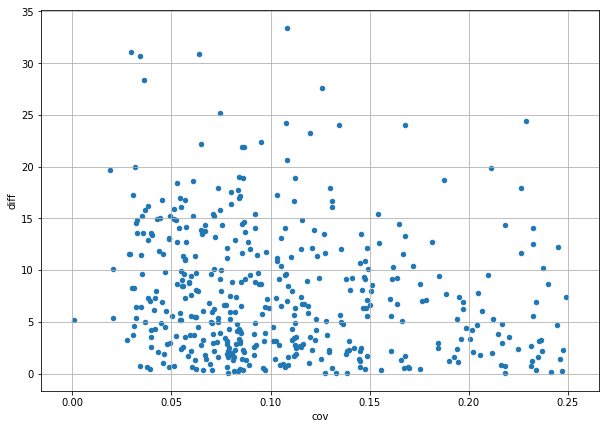

In [34]:
%matplotlib inline
cov_diff[cov_diff['cov'] < 0.25].plot(x='cov', y='diff', kind='scatter', grid=True, figsize=(10, 7))

In [35]:
cov_diff['cov'].corr(cov_diff['diff'])

-0.085101461907195336

In [58]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = cov_diff['diff'][cov_diff['diff'].notnull()].apply(lambda x: round(x)).sort_values()

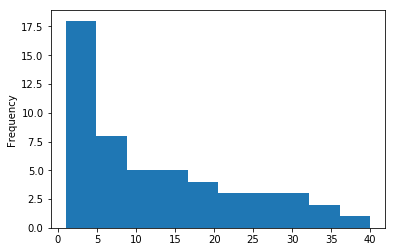

In [90]:
h.value_counts().plot(kind='hist')